### 1. Download an example image from ZTF using the IRSA website. You can save the image to disk manually at this point. Open it using python FITS interface and show the image.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, simple_norm
plt.style.use(astropy_mpl_style)

In [48]:
from astropy.io import fits

img1_fname = "data/ztf_000792_zg_c06_q4_refimg.fits"

def plot_image(filename, norm=False):

    with fits.open(filename) as hdul:
    # fits.open() returns an HDUList (Header Data Unit) containing file data and metadata
        hdul.info()

    img_data = fits.getdata(filename, ext=0)    # ext=0 because image data is located in PRIMARY, a.k.a. extension 0
    # # normalize image data values from 10,000s to <5
    norm_class = simple_norm(img_data, stretch='log')
    img_data_norm = norm_class(img_data)
#     plt.clf()
    plt.figure(figsize=(8,8), dpi=400)
    plt.grid(visible=False)
    if norm:
        plt.imshow(img_data_norm, cmap='gray')
    else:
        plt.imshow(img_data, vmin=250, vmax=500, cmap='gray')
    plt.colorbar()
    plt.show()
    plt.close()
    

Filename: data/ztf_000792_zg_c06_q4_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


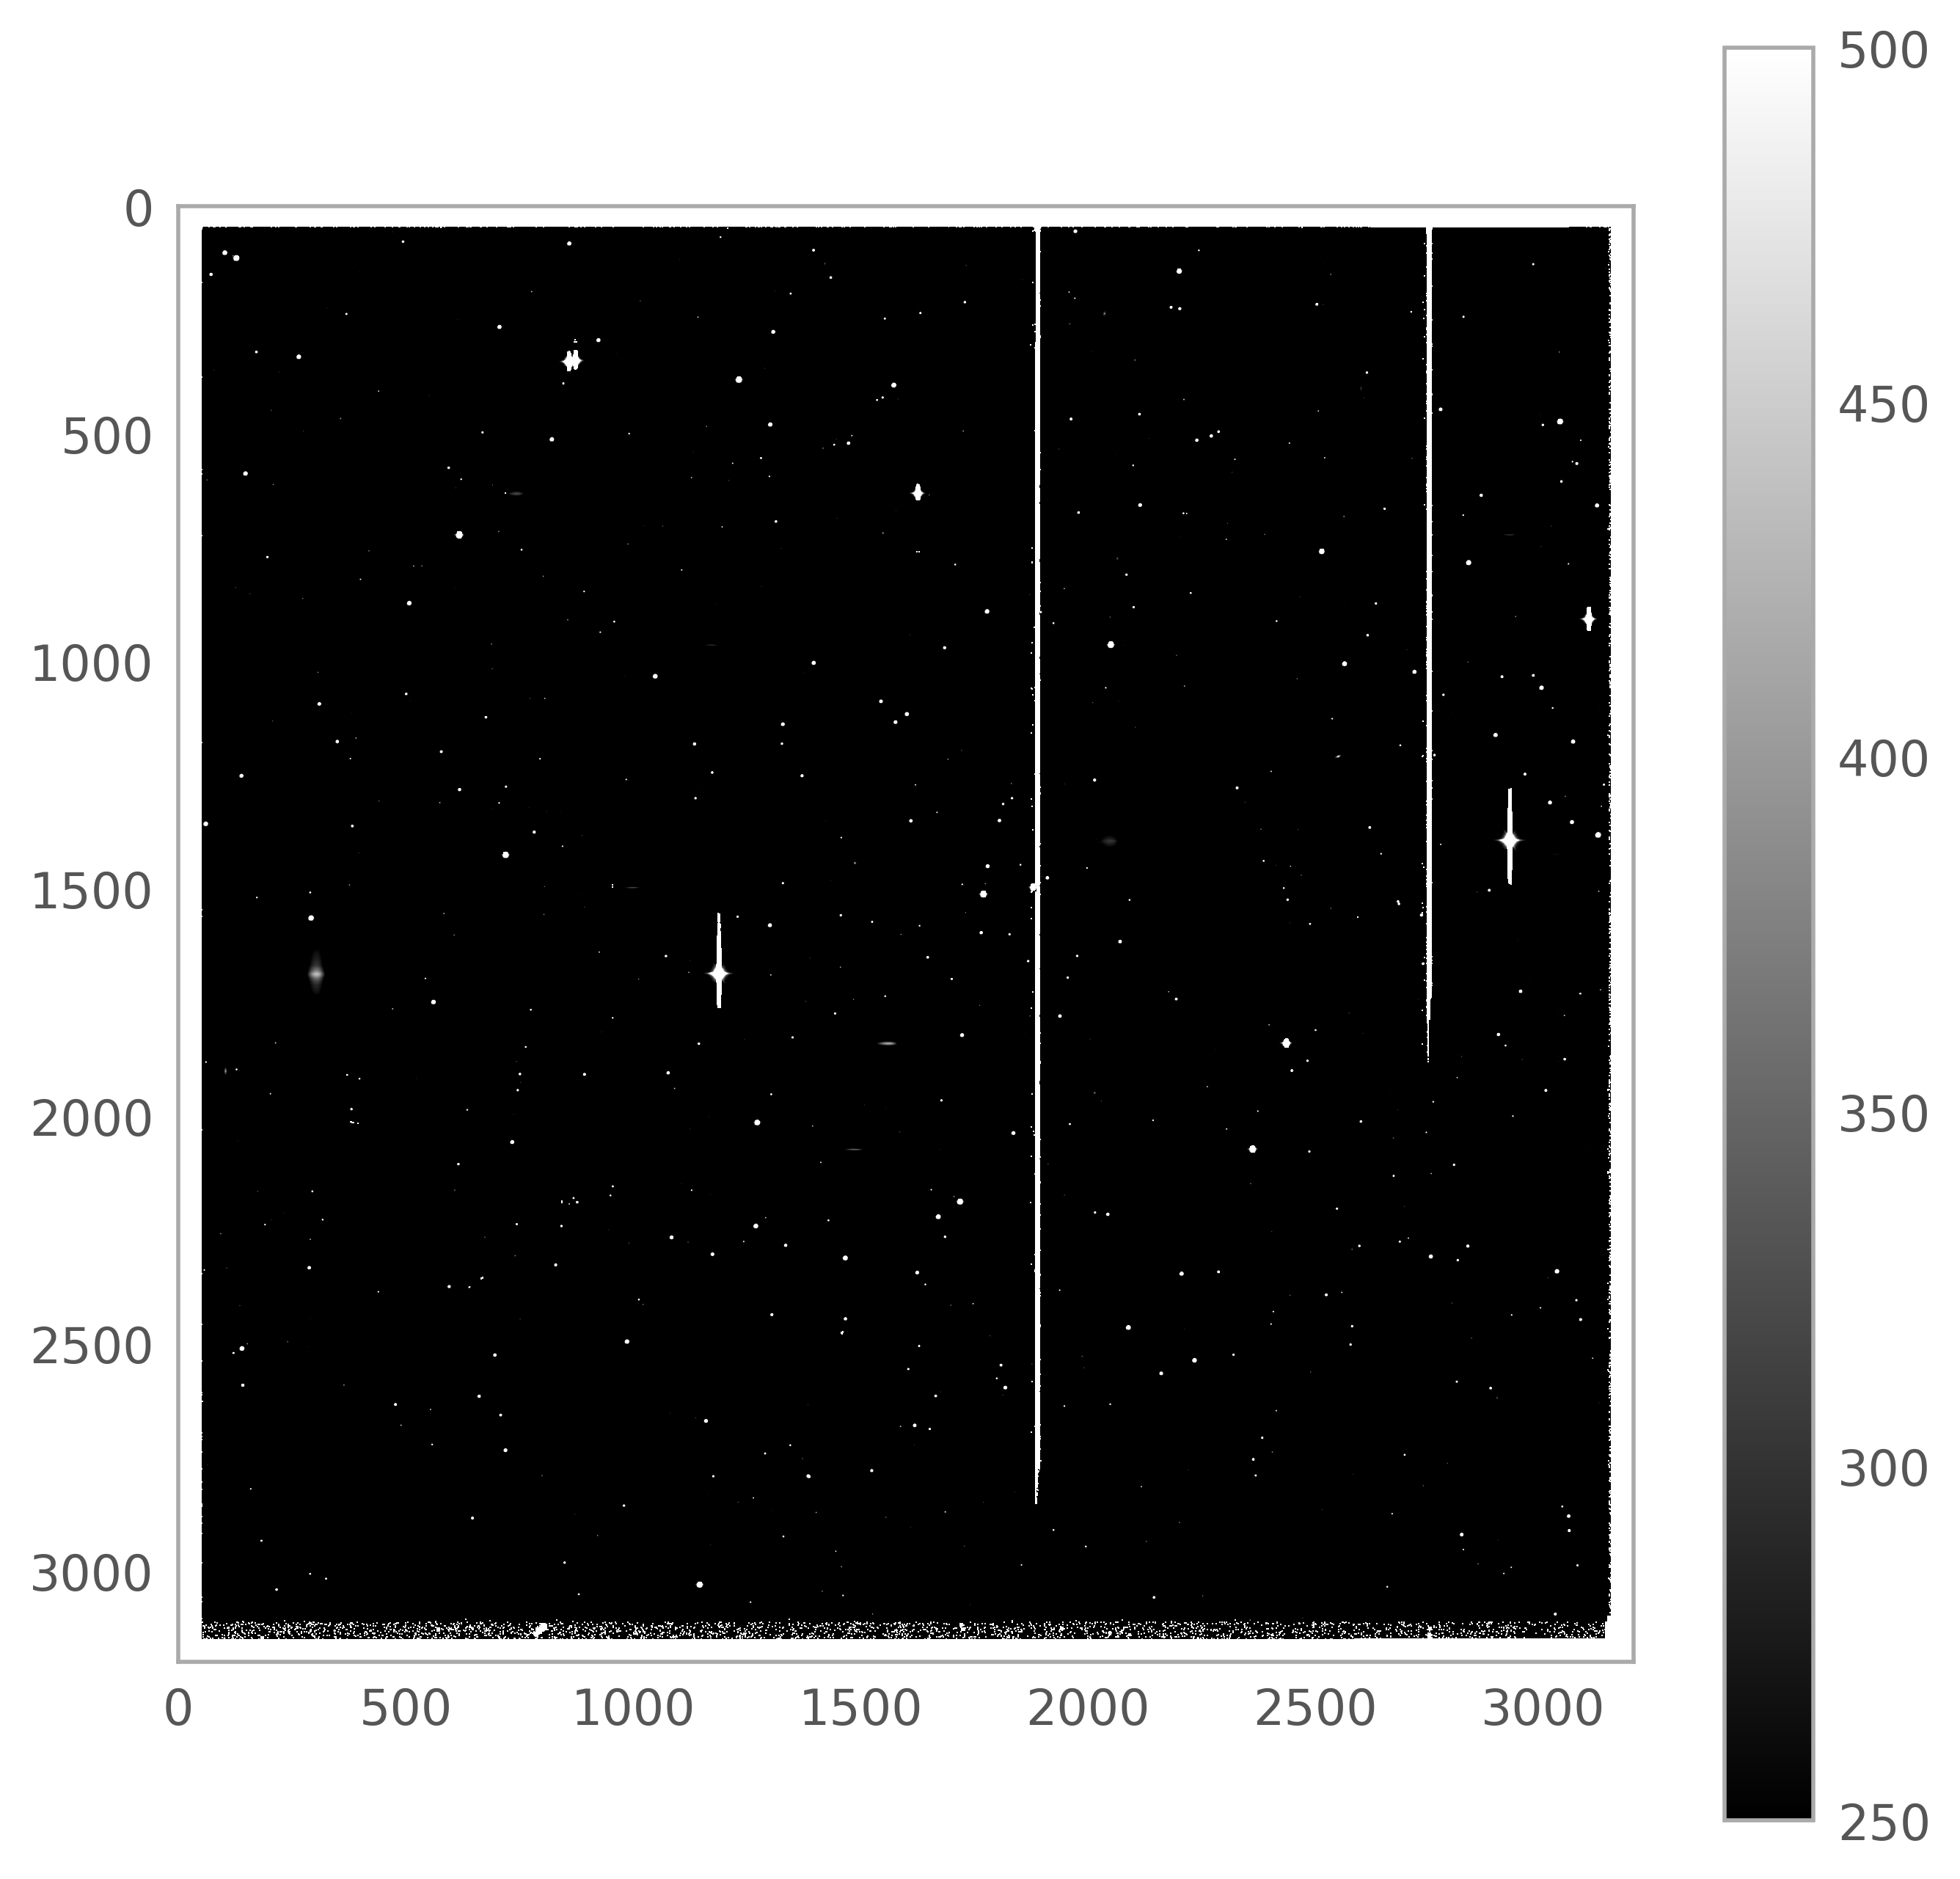

In [50]:
plot_image(img1_fname)

### 2. Sometimes streaks in images go vertically or horizontally across. Finding them is easy because we already know the angle of the streak. Use numpy to write a simple algorithm that can tell you if a streak exists, and which column/row it is on. Assume the streak is long (crosses the entire image) like in the case of LEO satellite streaks.


In [24]:
"""
Returns a list of the column/row indices where constant-intensity 
streaks that cross the entire image exist in the given image.
Returned list may be empty, in which case the image has no streaks.
IMAGE should be a 2D array representing an image.
"""
def find_streaks(image):
    streak_indices = []
    height = image.shape[0]
    width = image.shape[1]
    
    avg_intensity = np.mean(image)
    
    # loop through all rows
    for i in range(height):
        first_value = image[i, 0]
        row = image[i, :]
        if np.mean(row) > avg_intensity and np.all(row == first_value):
            # could also compare to row avg instead of first value, but avg takes more computation
            streak_indices.append(i)
    
    # loop through all columns
    for i in range(width):
        first_value = image[0, i]
        col = image[:, i]
        if np.mean(col) > avg_intensity and np.all(col == first_value):
            streak_indices.append(i)
            
    return streak_indices
    
find_streaks(img_data)

[]

### 3. Bonus: For an image with a given size and assuming Gaussian (normal) noise in each pixel (and ignoring stars and other artefacts) what should be the detection threshold for the algorithm? How does this threshold depend on the false alarm rate?

In [ ]:
# what is this threshold for?

### 4. Write a script that downloads ZTF images from IRSA. You can use “ztfquery” which is a python package that helps automate some of the work. You should be able, at least, give the RA and Dec coordinates and get an image on disk somewhere that you know how to find and load it later.

In [55]:
from ztfquery import query

# downloaded sample: ra = 215.73722243, dec = 53.51269493 (5 images)
# downloaded sample: ra = 212.51393850, dec = 57.40139250 (4 images)

"""
Fetches ZTF reference images from ISRA within SIZE of given 
RA and DEC coordinates, and downloads them into the ./data folder.
Need an ISRA account for this to work properly.
"""
def download_ZTF_images(ra, dec, size=0.0001):
    zquery = query.ZTFQuery()
    zquery.load_metadata(kind="ref",radec=[ra, dec], size=size)
    print(zquery.metatable[["field","filtercode", "ccdid","qid"]])
    zquery.download_data("refimg.fits", show_progress=True, verbose=True, overwrite=True)
    

In [57]:
download_ZTF_images(215.73722243, 53.51269493)

   field filtercode  ccdid  qid
0    792         zr      6    4
1    792         zi      6    4
2   1795         zr     15    3
3    792         zg      6    4
4   1795         zg     15    3
reference_path: {'paddedfield': '000792', 'filtercode': 'zr', 'paddedccdid': '06', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zi', 'paddedccdid': '06', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '001795', 'filtercode': 'zr', 'paddedccdid': '15', 'qid': '3', 'fieldprefix': '001', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zg', 'paddedccdid': '06', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '001795', 'filtercode': 'zg', 'paddedccdid': '15', 'qid': '3', 'fiel

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:643: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zr/ccd06/q4/ztf_000792_zr_c06_q4_refimg.fits to ./Data/ref/000/field000792/zr/ccd06/q4/ztf_000792_zr_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zi/ccd06/q4/ztf_000792_zi_c06_q4_refimg.fits to ./Data/ref/000/field000792/zi/ccd06/q4/ztf_000792_zi_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits to ./Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zg/ccd06/q4/ztf_000792_zg_c06_q4_refimg.fits to ./Data/ref/000/field000792/zg/ccd06/q4/ztf_000792_zg_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001795/zg/ccd15/q3/ztf_001795_zg_c15_q3_refimg.fits to ./Data/ref/001/field001795/zg/ccd15/q3/ztf_001795_zg_c15_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)


delayed


In [56]:
download_ZTF_images(212.51393850, 57.40139250)

   field filtercode  ccdid  qid
0   1826         zr      6    3
1    792         zi     15    4
2    792         zg     15    4
3    792         zr     15    4
reference_path: {'paddedfield': '001826', 'filtercode': 'zr', 'paddedccdid': '06', 'qid': '3', 'fieldprefix': '001', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zi', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zg', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zr', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:643: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits to ./Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits to ./Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zg/ccd15/q4/ztf_000792_zg_c15_q4_refimg.fits to ./Data/ref/000/field000792/zg/ccd15/q4/ztf_000792_zg_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zr/ccd15/q4/ztf_000792_zr_c15_q4_refimg.fits to ./Data/ref/000/field000792/zr/ccd15/q4/ztf_000792_zr_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)


delayed


Filename: Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


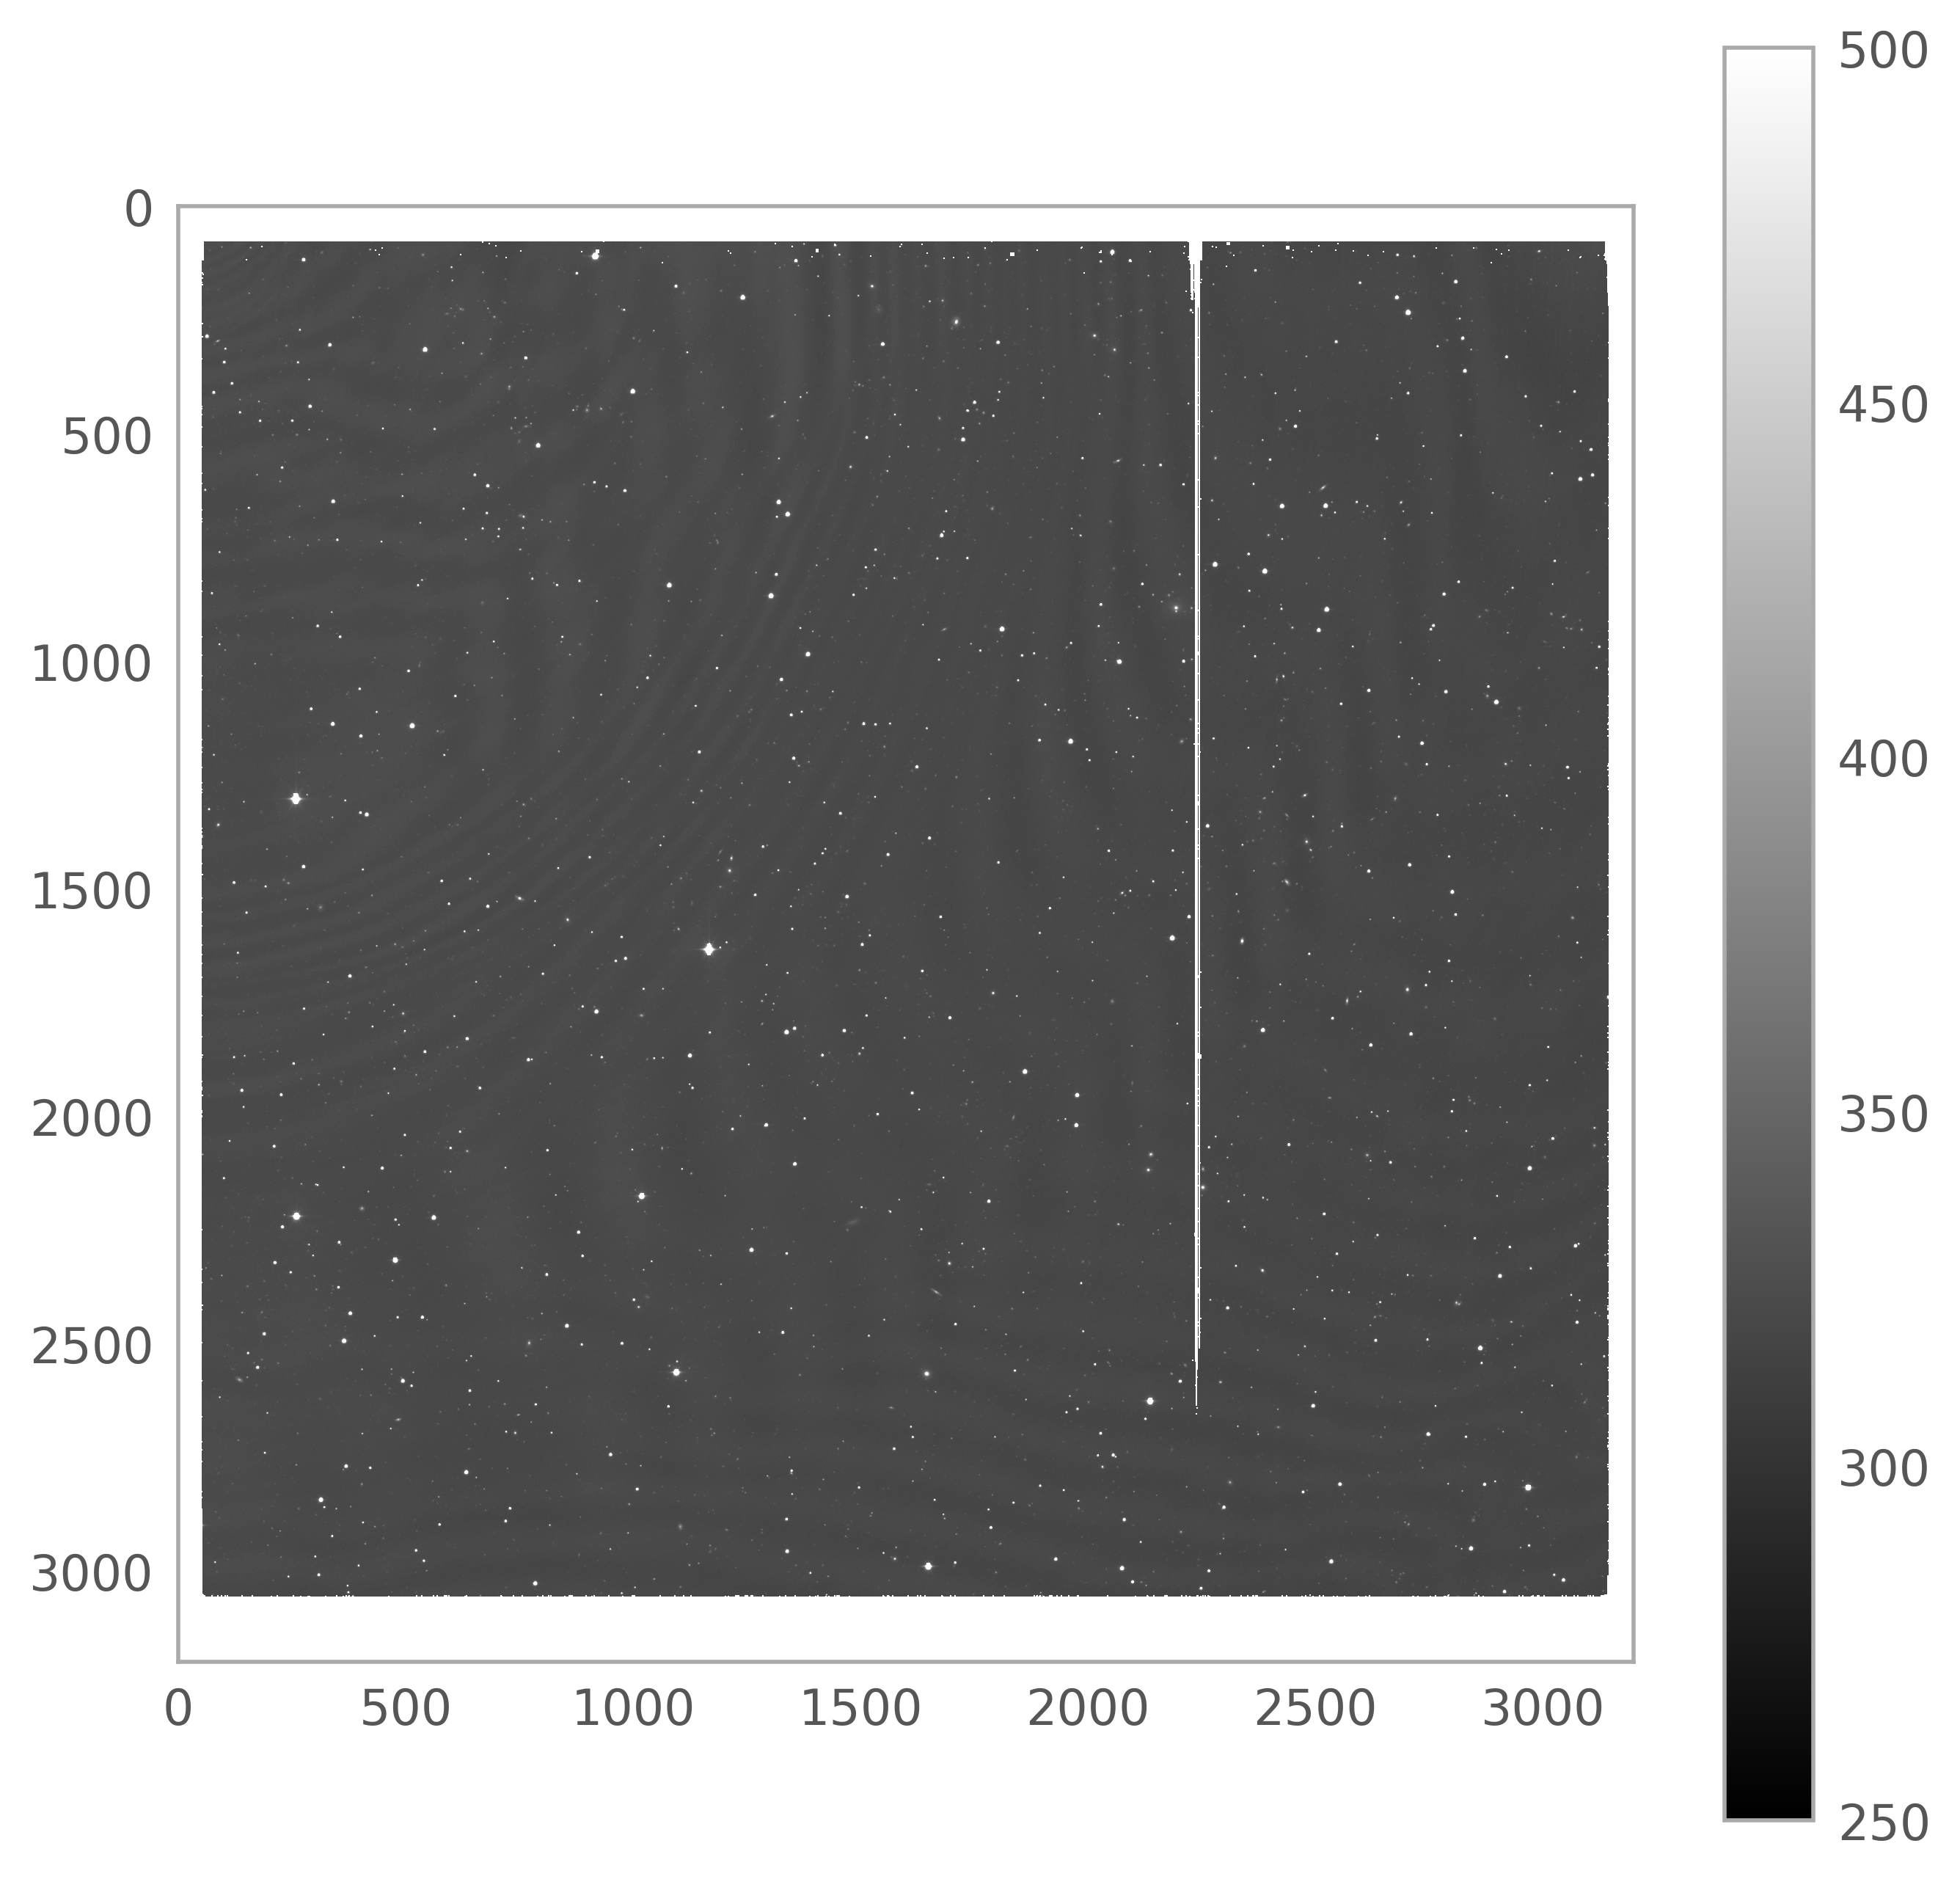

In [49]:
img2_fname = "Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits"
plot_image(img2_fname, norm=False)

Filename: Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


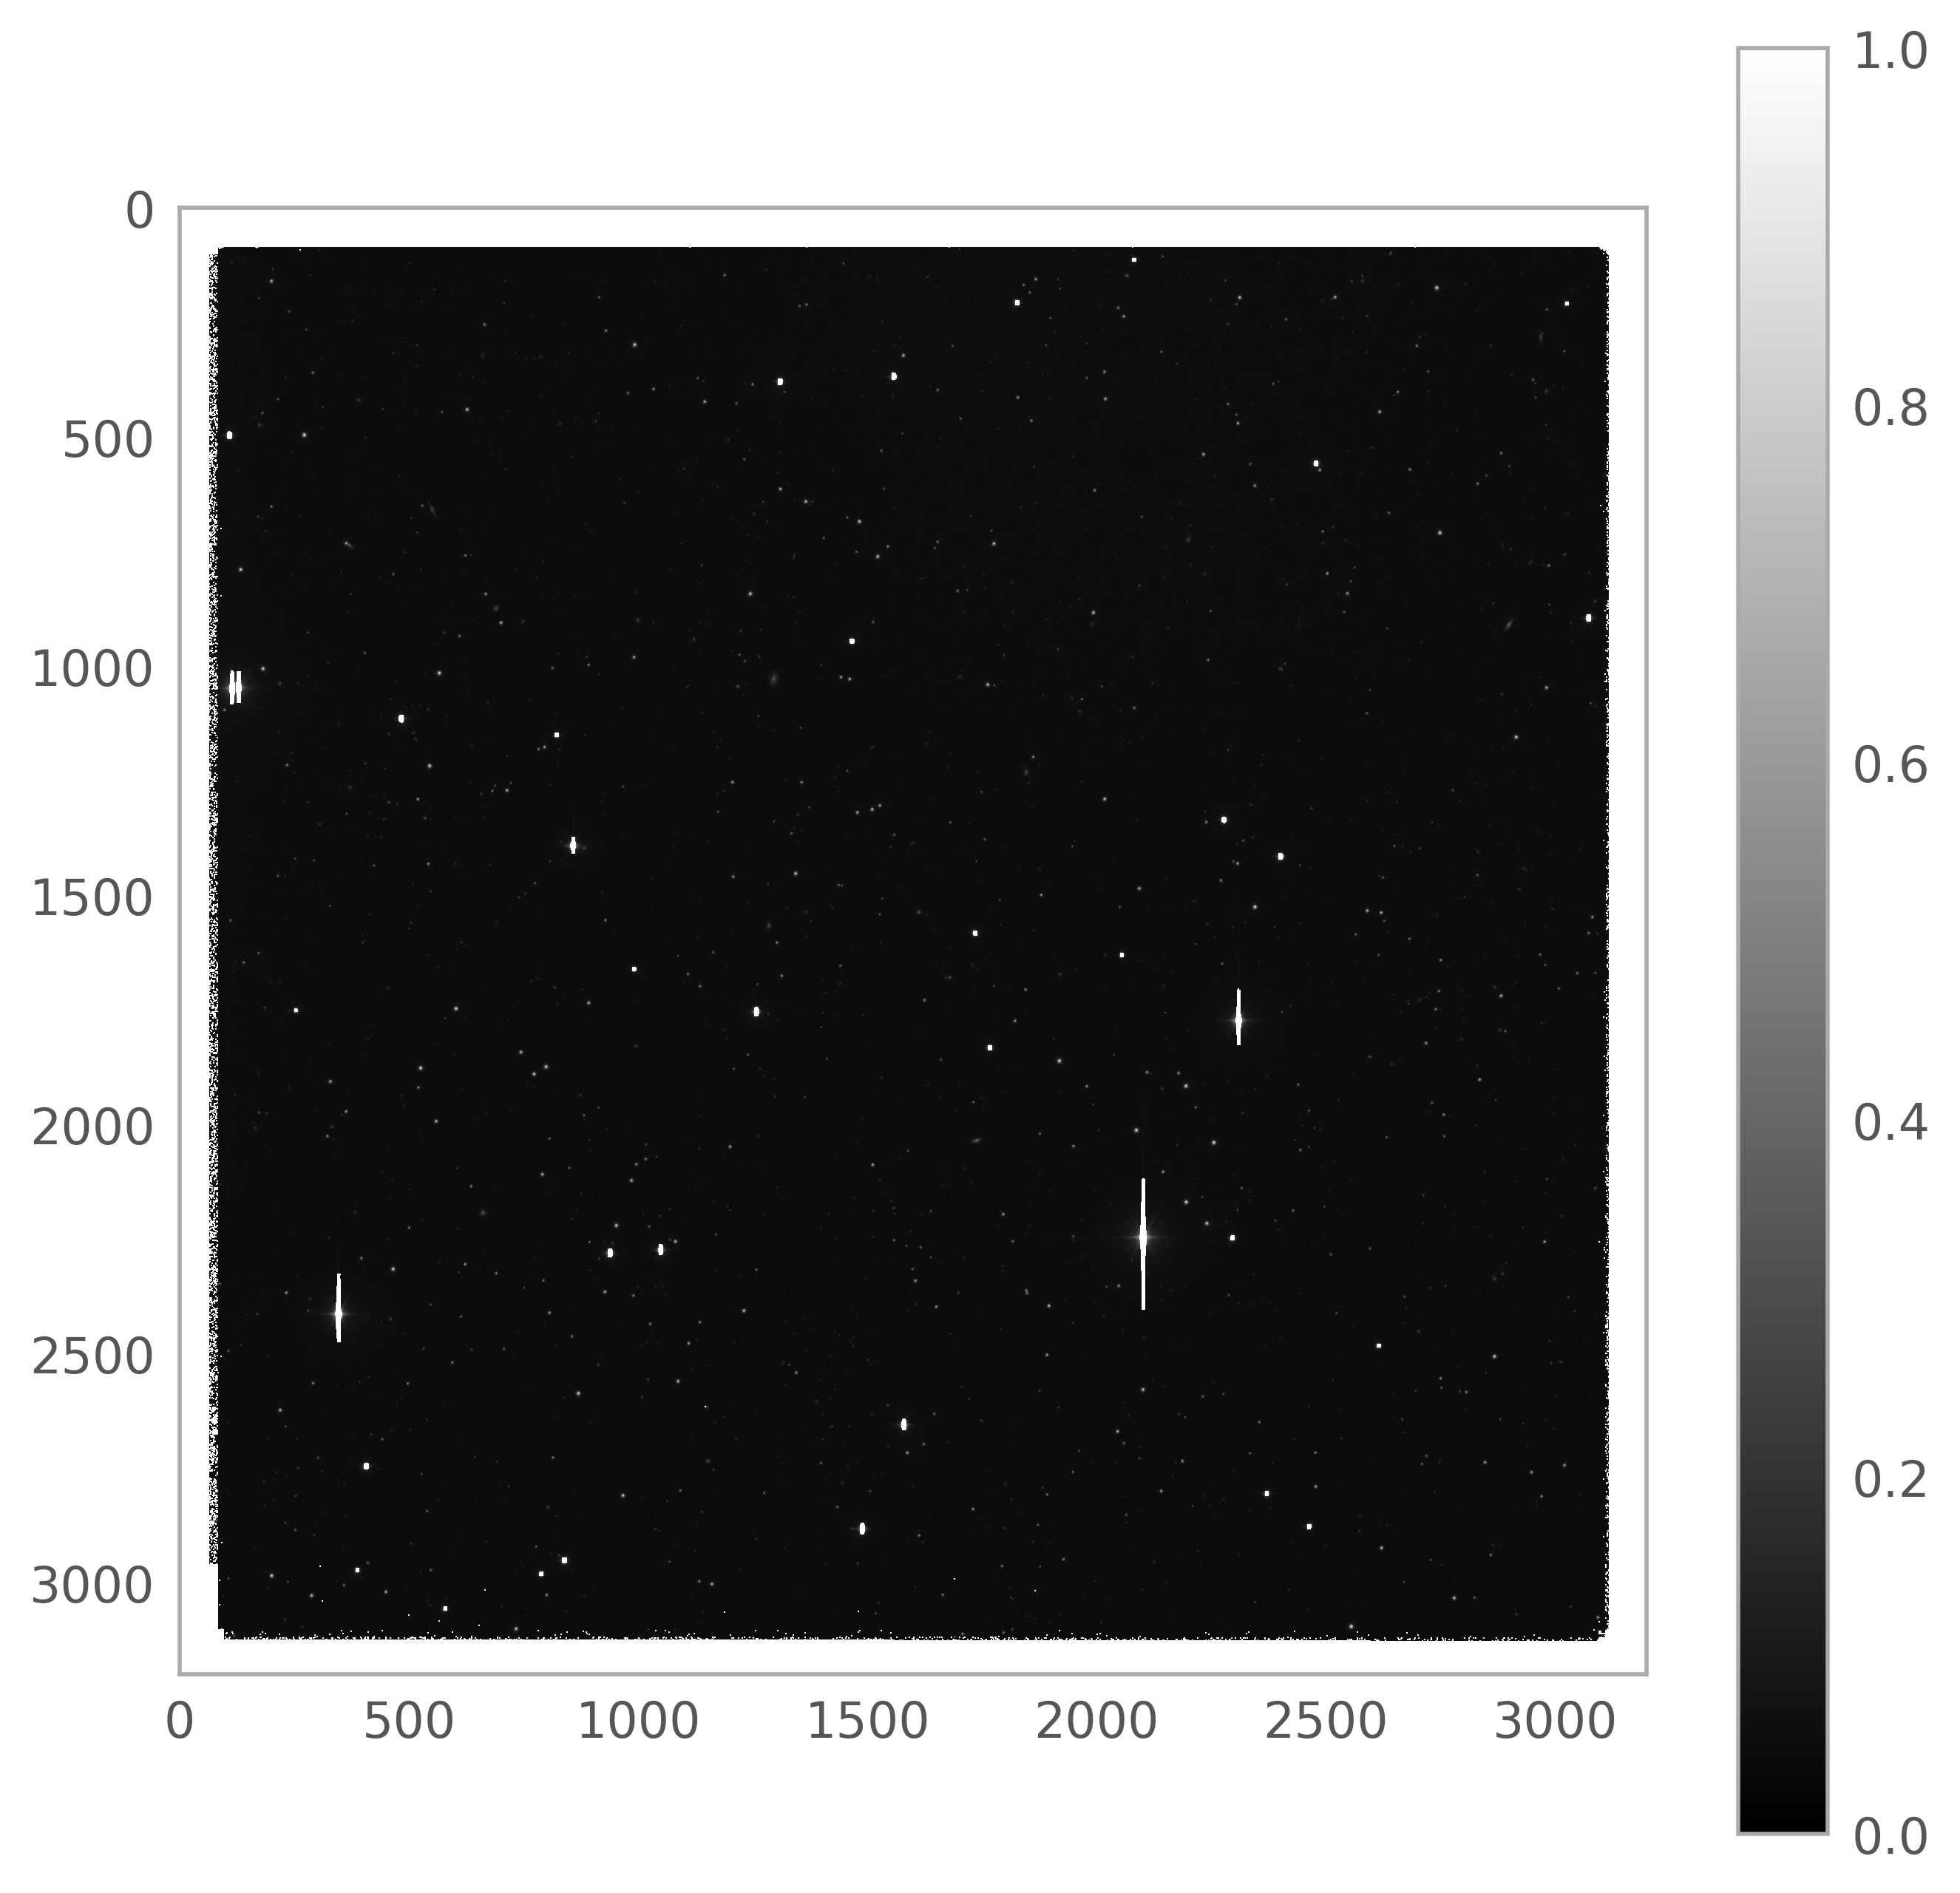

In [59]:
img3_fname = "Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits"
plot_image(img3_fname, norm=True)

Filename: Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


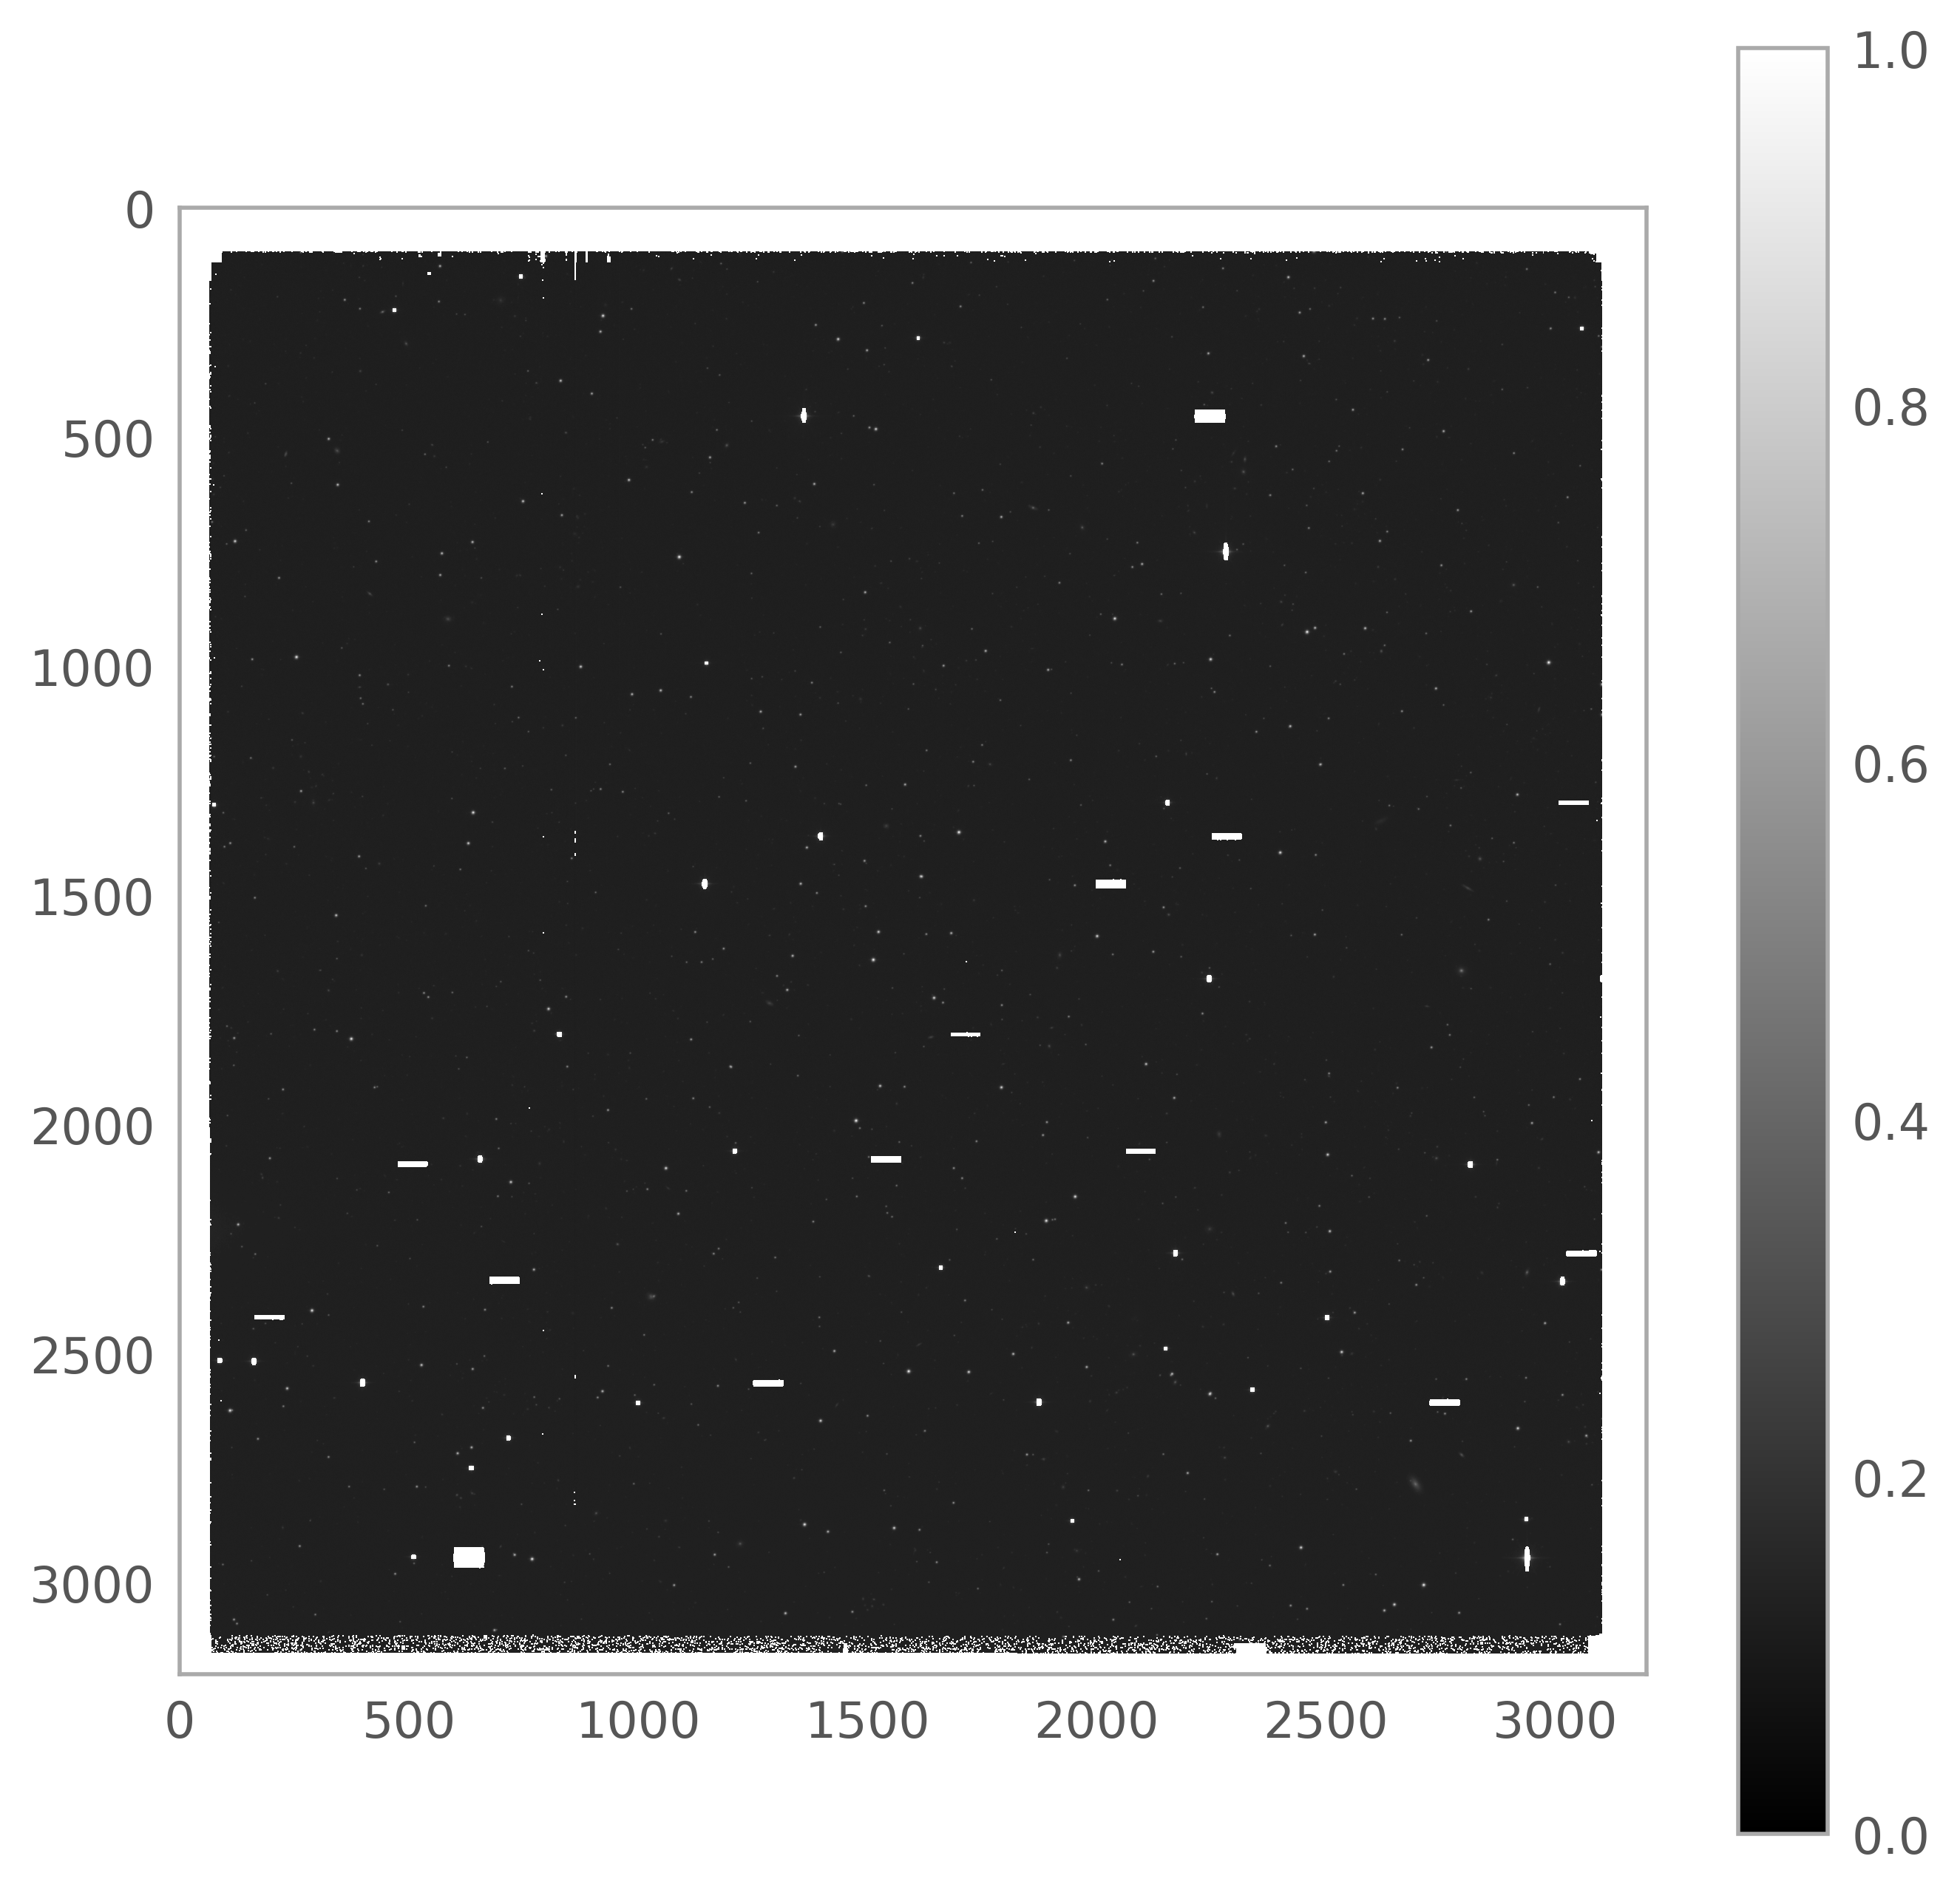

In [54]:
img4_fname = "Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits"
plot_image(img4_fname, norm=True)

### 5. Bonus: what coordinates should we use to look for geostationary satellites? Would the first order answer change if we include the position of the ZTF telescope (on mount Palomar in California) and the altitude of the geostationary orbit above the Earth’s equator?